In [13]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch import nn
from torch.optim import SGD
import random
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torch.optim import Adam
import matplotlib.pyplot as plt

# Загрузка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Разделение на обучающую, валидационную и тестовую выборки
train_size = int(0.8 * len(mnist_train))
val_size = len(mnist_train) - train_size
mnist_train, mnist_val = random_split(mnist_train, [train_size, val_size])

# Создание загрузчиков данных
batch_size = 64
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

# Определение модели Sequential
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Обучение модели
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0  # для хранения общей потери на эпохе
    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()  # добавляем потерю к общей потере на эпохе

    # Выводим информацию о потерях после каждой эпохи
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader)}')

# Классификация случайных изображений из тестового набора
model.eval()
random_indices = random.sample(range(len(mnist_test)), 100)
# Списки для хранения истинных меток и предсказанных меток
true_labels = []
predicted_labels = []

# Получение предсказаний для выбранных 100 изображений
for index in random_indices:
    image, label = mnist_test[index]
    image = image.unsqueeze(0)  # добавляем размерность батча
    output = model(image)
    predicted_label = torch.argmax(output, dim=1).item()
    true_labels.append(label)
    predicted_labels.append(predicted_label)

# Преобразование в numpy массивы
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

Epoch 1/10, Loss: 0.298988630404075
Epoch 2/10, Loss: 0.1280998028231164
Epoch 3/10, Loss: 0.0902657144597421
Epoch 4/10, Loss: 0.06965407534192006
Epoch 5/10, Loss: 0.05513945313838
Epoch 6/10, Loss: 0.045026597602448114
Epoch 7/10, Loss: 0.03827913554447392
Epoch 8/10, Loss: 0.03194658687516737
Epoch 9/10, Loss: 0.027726708942636225
Epoch 10/10, Loss: 0.02357597431645263


In [14]:
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

In [15]:
# Вывод результатов
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.99
Precision: 0.9888888888888889
Recall: 0.9923076923076923
F1 score: 0.9901176470588237


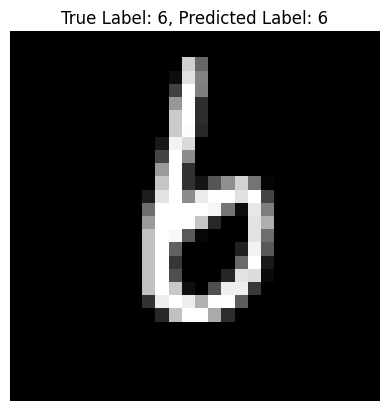

In [16]:
# Выберем случайное изображение из тестового набора данных
index = np.random.randint(len(mnist_test))
image, label = mnist_test[index]
image = image.unsqueeze(0)  # добавляем размерность батча

# Получим предсказание модели для этого изображения
model.eval()
with torch.no_grad():
    output = model(image)
    predicted_label = torch.argmax(output, dim=1).item()

# Отобразим изображение и его предсказание
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title(f'True Label: {label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()